# Statistical analysis in Python

* Instructional designers: Sébastien Boisvert (sebhtml) and Maria Virginia Ruiz (MaVi)
* Producer: Maria Virginia Ruiz
* Instructor: Sébastien Boisvert

Duration: 60 minutes


Note 1: This workshop is part of **The 100 Days of Data.trek Challenge**, IVADO, 2021.

Note 2: the material of this workshop is written in English, but the workshop is given in French.



## Breast Cancer Dataset

In [ ]:
import sklearn.datasets
 
breast_cancer_data = sklearn.datasets.load_breast_cancer()
 
display(pandas.DataFrame(breast_cancer_data.feature_names, columns = ["feature_names"]))
 
display(pandas.DataFrame(breast_cancer_data.target_names, columns = ["target_names"]))

,feature_names
0,mean radius
1,mean texture
2,mean perimeter
3,mean area
4,mean smoothness
5,mean compactness
6,mean concavity
7,mean concave points
8,mean symmetry
9,mean fractal dimension


,target_names
0,malignant
1,benign


QUESTION: what are these features describing ?

Let's join the pandas data frames.

In [ ]:
import pandas

X_dataframe = pandas.DataFrame(breast_cancer_data.data, columns = list(breast_cancer_data.feature_names))
y_dataframe = pandas.DataFrame(breast_cancer_data.target, columns = ["Target"])

dataframe = pandas.concat([X_dataframe, y_dataframe], axis=1)

display(dataframe)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Linear correlation

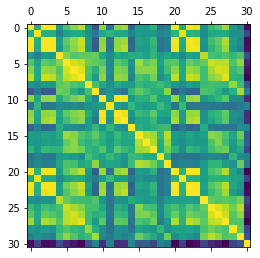

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


In [ ]:
import matplotlib.pyplot as plt

correlation_matrix = dataframe.corr()
plt.matshow(correlation_matrix)
plt.show()

display(correlation_matrix.head())

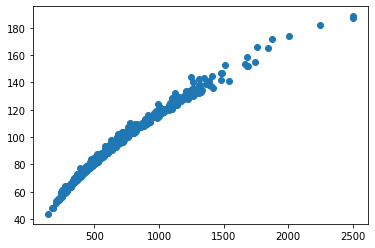

In [ ]:
# Good correlation

plt.scatter(dataframe["mean area"], dataframe["mean perimeter"])
plt.show()

# QUESTION: what is the correlation between "mean area" and "mean perimeter" according to the table above ?

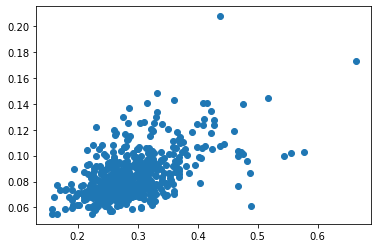

In [ ]:
# Bad correlation

plt.scatter(dataframe["worst symmetry"], dataframe["worst fractal dimension"])
plt.show()

## Density of a column

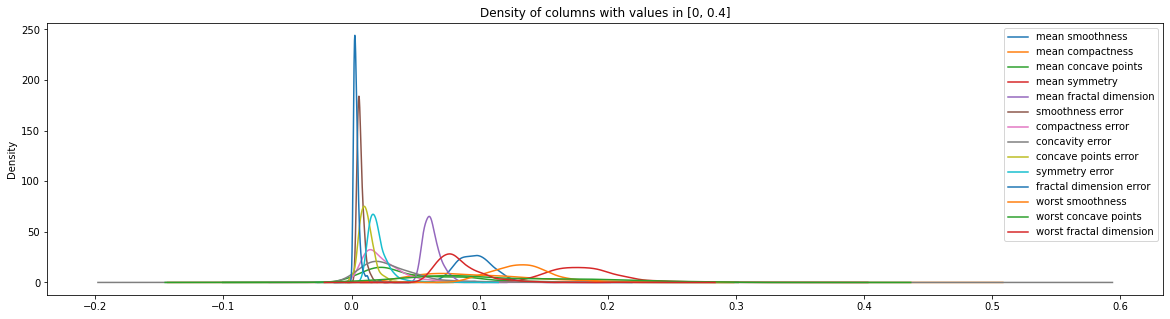

In [ ]:

for column in dataframe.columns:
  if 0 <= dataframe[column].min() and dataframe[column].max() <= 0.4:
    dataframe[column].plot.kde(legend=True, figsize=[20,5], title="Density of columns with values in [0, 0.4]")

plt.show()

# QUESTION: which column in the plot has the lowest variance ?

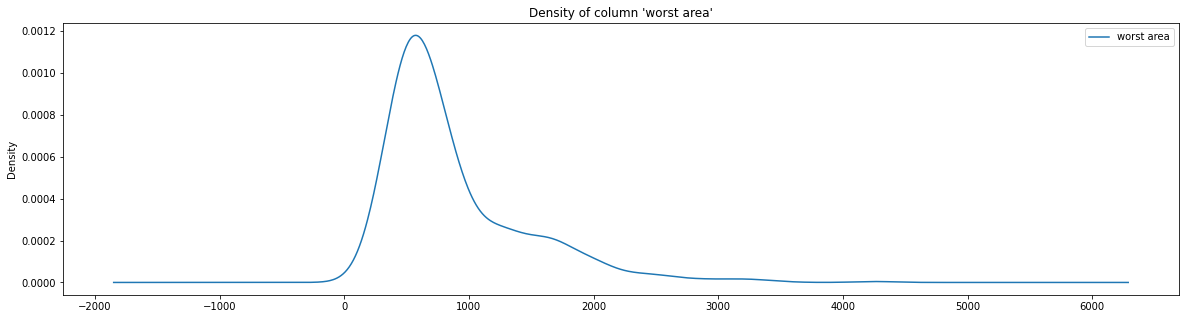

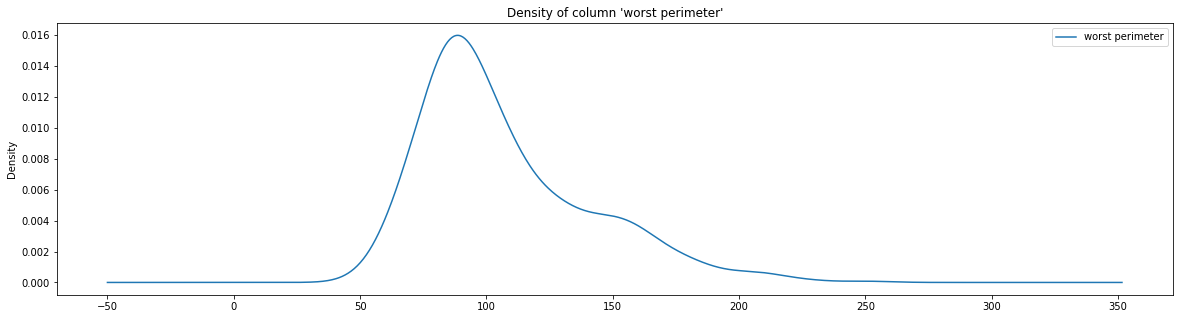

In [ ]:
# Bad behaved columns

dataframe["worst area"].plot.kde(legend=True, figsize=[20,5], title="Density of column 'worst area'")
plt.show()

dataframe["worst perimeter"].plot.kde(legend=True, figsize=[20,5], title="Density of column 'worst perimeter'")
plt.show()

## Statistical measures

Let's compute some statistical measures for each columns.

In [ ]:



measures = {
  "mean": lambda x : x.mean(),
  "variance": lambda x : x.var(),
  "standard_deviation": lambda x : x.std(),
}

# QUESTION : how can we add median, minimum, and maximum in this Python code ?

def make_measures(column):
  return [column] + [v(dataframe[column]) for k,v in measures.items()]

measures_data = list(map(make_measures, list(dataframe.columns)))

#measures_data
measures_table = pandas.DataFrame(measures_data, columns=["Feature_name"] + [k for k,v in measures.items()])

measures_table


,Feature_name,mean,variance,standard_deviation
0,mean radius,14.127292,12.418920,3.524049
1,mean texture,19.289649,18.498909,4.301036
2,mean perimeter,91.969033,590.440480,24.298981
3,mean area,654.889104,123843.554318,351.914129
4,mean smoothness,0.096360,0.000198,0.014064
5,mean compactness,0.104341,0.002789,0.052813
6,mean concavity,0.088799,0.006355,0.079720
7,mean concave points,0.048919,0.001506,0.038803
8,mean symmetry,0.181162,0.000752,0.027414
9,mean fractal dimension,0.062798,0.000050,0.007060


## Rescaling

In [ ]:
from sklearn import preprocessing

column_name = "worst area"
min_max_scaler = preprocessing.MinMaxScaler()

input_dataframe = dataframe[[column_name]]
min_value = input_dataframe[column_name].min()
max_value = input_dataframe[column_name].max()
print("Min: {}  Max:  {}".format(min_value, max_value))

scaled_input = min_max_scaler.fit_transform(input_dataframe)
rescaled_column_name = "rescaled " + column_name
output_dataframe = pandas.DataFrame(scaled_input, columns = [rescaled_column_name])

rescaled_dataframe = pandas.concat([input_dataframe, output_dataframe], axis=1)
rescaled_dataframe

Min: 185.2  Max:  4254.0


,worst area,rescaled worst area
0,2019.0,0.450698
1,1956.0,0.435214
2,1709.0,0.374508
3,567.7,0.094008
4,1575.0,0.341575
...,...,...
564,2027.0,0.452664
565,1731.0,0.379915
566,1124.0,0.230731
567,1821.0,0.402035


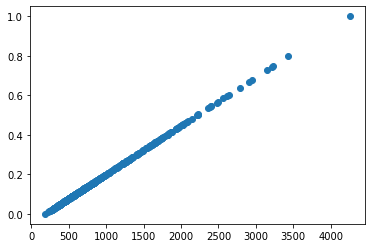

In [ ]:
# How rescaling work ?

plt.scatter(rescaled_dataframe[column_name], rescaled_dataframe[rescaled_column_name])
plt.show()

In [ ]:
# Perfect correlation
display(rescaled_dataframe.corr())

,worst area,rescaled worst area
worst area,1.0,1.0
rescaled worst area,1.0,1.0


## Covariance

In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

source: https://en.wikipedia.org/wiki/Covariance

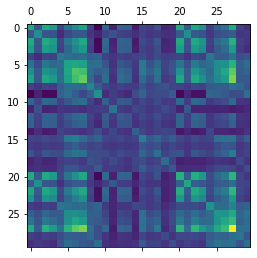

In [ ]:

# Plot covariance matrix

plt.matshow(covariance_matrix)
plt.show()

# This is not useful, because our data is not scaled.


In [ ]:
# Let's us show the covariance as a table.

covariance_matrix = dataframe.cov()
display(covariance_matrix.head())

# This is not useful nor intelligible, due to scaling.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-0.007754,0.663650,-0.189189,4.803550,117.968162,-0.002355,0.013001,0.020659,0.008180,-0.003039,-0.000398,16.513749,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,-1.244954
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-0.002321,0.329037,0.916695,2.449449,50.840865,0.000085,0.014787,0.018604,0.004348,0.000325,0.000620,7.329267,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,-0.864145
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-0.044859,4.661401,-1.162988,34.053028,823.492755,-0.014788,0.109111,0.167296,0.061055,-0.016396,-0.000355,113.858063,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,-8.732438
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-0.703426,71.490945,-12.867168,517.009995,12808.517580,-0.176221,1.339725,2.205952,0.808460,-0.210896,-0.018519,1637.521341,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,-120.738222
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,0.000058,0.001176,0.000531,0.008420,0.157742,0.000014,0.000080,0.000105,0.000033,0.000023,0.000011,0.014487,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,-0.002440


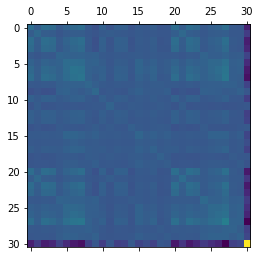

In [ ]:
# Let's re-scale the data

min_max_scaler = preprocessing.MinMaxScaler()

scaled_dataframe = pandas.DataFrame(min_max_scaler.fit_transform(dataframe), columns = dataframe.columns)

covariance_matrix = scaled_dataframe.cov()

plt.matshow(covariance_matrix)
plt.show()

The yellow square is the covariance of Target with itself.

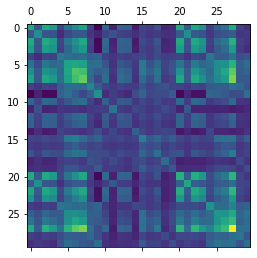

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,0.027818,0.007855,0.027946,0.024582,0.003612,0.013675,0.021083,0.026458,0.003412,-0.007729,0.011374,-0.001979,0.010712,0.010428,-0.003789,0.004621,0.002469,0.007333,-0.002024,-0.000650,0.027804,0.008115,0.026939,0.021964,0.003008,0.010527,0.014644,0.028038,0.003335,0.000140
mean texture,0.007855,0.021156,0.008048,0.006972,-0.000432,0.005577,0.008216,0.008232,0.001438,-0.001653,0.004029,0.006851,0.003903,0.003211,0.000098,0.003756,0.001589,0.002786,0.000154,0.000724,0.008818,0.021731,0.008715,0.006992,0.001700,0.006169,0.007296,0.009703,0.001863,0.002054
mean perimeter,0.027946,0.008048,0.028195,0.024727,0.004419,0.015149,0.022461,0.027558,0.004255,-0.006529,0.011665,-0.001776,0.011088,0.010629,-0.003474,0.005663,0.002919,0.007992,-0.001594,-0.000085,0.027990,0.008336,0.027269,0.022123,0.003812,0.011682,0.015777,0.029253,0.003873,0.001015
mean area,0.024582,0.006972,0.024727,0.022283,0.003355,0.012054,0.019127,0.023701,0.003127,-0.006284,0.010981,-0.001206,0.010333,0.010148,-0.002541,0.004268,0.002363,0.006496,-0.001259,-0.000271,0.024710,0.007030,0.023960,0.020036,0.002780,0.008896,0.012751,0.024345,0.002614,0.000066
mean smoothness,0.003612,-0.000432,0.004419,0.003355,0.016121,0.013557,0.012379,0.013558,0.009805,0.011041,0.003844,0.001059,0.003581,0.002660,0.004307,0.005447,0.002404,0.005649,0.002965,0.003292,0.004653,0.000750,0.005075,0.003673,0.015417,0.009157,0.009202,0.014427,0.006106,0.007510


In [ ]:
# Let's remove the target column.
# QUESTION: why is the removal of the target column improving the covariance matrix ?

scaled_dataframe = pandas.DataFrame(min_max_scaler.fit_transform(X_dataframe), columns = X_dataframe.columns)

covariance_matrix = scaled_dataframe.cov()

plt.matshow(covariance_matrix)
plt.show()

display(covariance_matrix.head())

## False positive rate, true positive rate, and Receiver Operating Characteristic

* Negative example (0, "benign breast cancer")
* Positive example (1, "malignant breast cancer")
* true vs false
* True positive vs false positive
* False positive vs true positive




In [ ]:
# Try to learn the patterns using a Support Vector Machine
# QUESTION: is Breast Cancer Dataset a learnable problem ?   Probably, since it ships with sklearn !

import numpy as np
from sklearn.model_selection import train_test_split

X = breast_cancer_data.data
y = breast_cancer_data.target

# Split in a train set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Learn a model

from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

print("train set set: {}".format(len(X_train)))
print("examples from the train set used by the classifier: {}".format(len(clf.support_vectors_)))
print("constant of the classifier: {}".format(clf.C))
print("kernel of the classifier: {}".format(clf.kernel))




train set set: 381
examples from the train set used by the classifier: 114
constant of the classifier: 1.0
kernel of the classifier: rbf


Given a classifier, an interesting statistical measure is the area under the ROC curve.
ROC means receiver operating characteristic.

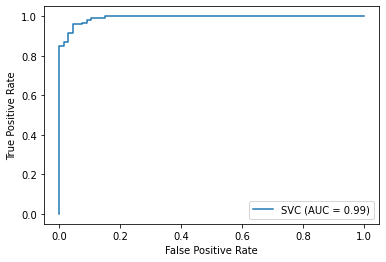

In [ ]:
# Assess the quality of the classifier using our test dataset.

from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()


## TODO

```

* Probability distributions (duration: 10 min)
** Why do we need probability distributions ?
** The simplest distribution: Bernoulli distribution
** Normal distribution

* Statistical hypothesis testing (duration: 10 min)
** Hypotheses h0 and alternative hypothesis h1
** The simplest statistical test: Student’s t-test
```


## Links

* https://scipy-lectures.org/packages/statistics/index.html
* https://www.twilio.com/blog/2017/10/basic-statistics-python-numpy-jupyter-notebook.html
* https://ivado.ca/evenements/100-jours-de-ran-donnees-2/
* https://ivado.ca/en/events/the-100-days-of-data-trek-challenge/
* http://www.aebinum.umontreal.ca/datatrek2021.html
